<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd 
import numpy as np


In [42]:
# https://github.com/krishnaik06/Car-Price-Prediction/blob/master/Untitled.ipynb

In [43]:
df=pd.read_csv('/content/car data.csv')

In [44]:
df.head(2)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [45]:
df['Current_Year']=2021

In [46]:
df['car_age']=df['Current_Year']-df['Year']

In [47]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year',
       'car_age'],
      dtype='object')

In [54]:
df1=df[['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','car_age']]
# [[ 'Selling_Price', 'Present_Price', 'Kms_Driven', 'car_age']]
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
df1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


In [56]:

df1=pd.get_dummies(df1,drop_first=True)

In [57]:
df1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1


In [ ]:
# Lets consider only Age and Fare columns 

In [58]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [59]:
# Feature importance 
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [60]:
model.feature_importances_

array([3.88967300e-01, 3.89004158e-02, 3.11599817e-04, 7.78826953e-02,
       2.26185533e-01, 7.78577479e-03, 1.29496701e-01, 1.30469980e-01])

In [63]:
import matplotlib.pyplot as plt


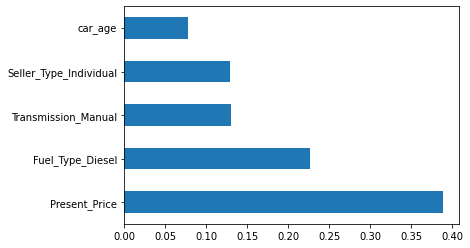

In [64]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()